# Fundamentos de la Computación Cuántica - Segunda Entrega

## Imports

In [92]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import PIL

Hola a todos/as,

 

para el miércoles 26/11 deben entregar la implementación en Quiskit con el correspondiente informe de:


a- ejercicio 10  del TP Operaciones (ParteI)

b- ejemplo 1 de ejercicio 1 de TP Paralelismo (Deutsch-Jozsa función constante igual a 1)

c- ejemplo 3 de ejercicio 1 de TP Paralelismo (Deutsch-Jozsa función balanceada)

d- ejemplo 4 de ejercicio 1 de TP Paralelismo (Deutsch-Jozsa función No balanceada)

 

Esta entrega, junto con la anterior, son parte de la evaluación integral de la cursada. 


Martín y Lucas

#### Full-Adder

Planteo del circuito:

In [93]:
full_adder = QuantumCircuit(4, name="Full-Adder");

full_adder.ccx(0, 1, 3)
full_adder.cx(0, 1)
full_adder.ccx(1, 2, 3)
full_adder.cx(1, 2)
full_adder.cx(0, 1)

full_adder.draw()

q_0: ──■────■──────────────■──
       │  ┌─┴─┐          ┌─┴─┐
q_1: ──■──┤ X ├──■────■──┤ X ├
       │  └───┘  │  ┌─┴─┐└───┘
q_2: ──┼─────────■──┤ X ├─────
     ┌─┴─┐     ┌─┴─┐└───┘     
q_3: ┤ X ├─────┤ X ├──────────
     └───┘     └───┘

In [94]:
full_adder_measured = QuantumCircuit(4, 2, name="Full-Adder-Measured")

full_adder_measured.x(0)
full_adder_measured.x(2)

full_adder_measured.append(full_adder, [0, 1, 2, 3])

full_adder_measured.measure(2, 0)
full_adder_measured.measure(3, 1)

full_adder_measured.draw()

┌───┐┌─────────────┐      
q_0: ┤ X ├┤0            ├──────
     └───┘│             │      
q_1: ─────┤1            ├──────
     ┌───┐│  Full-Adder │┌─┐   
q_2: ┤ X ├┤2            ├┤M├───
     └───┘│             │└╥┘┌─┐
q_3: ─────┤3            ├─╫─┤M├
          └─────────────┘ ║ └╥┘
c: 2/═════════════════════╩══╩═
                          0  1

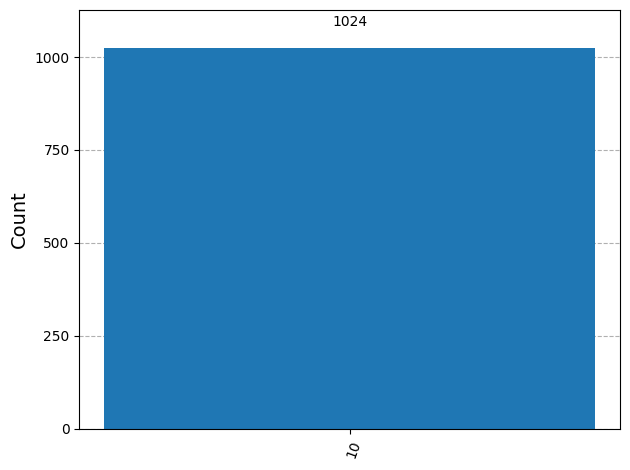

In [95]:
simulator = AerSimulator()

transpiled = transpile(full_adder_measured, simulator)
jobs = simulator.run(transpiled, shots=1024)
result = jobs.result()
counts = result.get_counts(transpiled)

plot_histogram(counts)

In [96]:
# --- 2. Creación del Circuito de Prueba (8 Combinaciones) ---
# c[0]: Entrada A (q0)
# c[1]: Entrada B (q1)
# c[2]: Entrada Cin (q2)
# c[3]: Salida S (q2)
# c[4]: Salia Cout (q3)
full_adder_measured = QuantumCircuit(4, 5) 

# Entradas en superposición.
full_adder_measured.h([0, 1, 2])

# Medición de las entradas (A, B y Cin) en bit 0, 1 y 2, respectivamente.
full_adder_measured.measure(0, 0)
full_adder_measured.measure(1, 1)
full_adder_measured.measure(2, 2)

# Aplicación de la compuerta Full-Adder.
full_adder_measured.append(full_adder, [0, 1, 2, 3])

# Medición de las salidas (S y Cout) en bits 3 y 4, respectivamente.
full_adder_measured.measure(2, 3)
full_adder_measured.measure(3, 4)

# Comprobación gráfica del circuito
full_adder_measured.draw()

┌───┐┌─┐      ┌─────────────┐      
q_0: ┤ H ├┤M├──────┤0            ├──────
     ├───┤└╥┘┌─┐   │             │      
q_1: ┤ H ├─╫─┤M├───┤1            ├──────
     ├───┤ ║ └╥┘┌─┐│  Full-Adder │┌─┐   
q_2: ┤ H ├─╫──╫─┤M├┤2            ├┤M├───
     └───┘ ║  ║ └╥┘│             │└╥┘┌─┐
q_3: ──────╫──╫──╫─┤3            ├─╫─┤M├
           ║  ║  ║ └─────────────┘ ║ └╥┘
c: 5/══════╩══╩══╩═════════════════╩══╩═
           0  1  2                 3  4

In [97]:
# --- 3. Ejecución y Resultados ---
simulator = AerSimulator()
transpiled = transpile(full_adder_measured, simulator)
job = simulator.run(transpiled, shots=1024)
results = job.result()
counts = results.get_counts(transpiled)

print("Resultados de las 8 combinaciones (Binario c4 c3 c2 c1 c0):")
print(counts)

Resultados de las 8 combinaciones (Binario c4 c3 c2 c1 c0):
{'00000': 111, '10110': 130, '11111': 132, '01001': 141, '01100': 145, '01010': 126, '10101': 132, '10011': 107}


Mapeo de columnas

In [98]:
# Definición de anchos de columna para consistencia.
W_BIT = 5  # Ancho para A, B, Cin, S y Cout.
W_COUNT = 15 # Ancho para Frecuencia.
W_CORRECT = 10 # Ancho de la correctitud del resultado.
TOTAL_WIDTH = W_BIT * 5 + W_COUNT + W_CORRECT + 22 # 8 barras y 14 espacios adicionales.

# Separador
def print_separator(width):
    print(f"|{'-' * (width - 2)}|") # -2 por las barras.

# Título
print_separator(TOTAL_WIDTH)
print(f"|{'Tabla de Verdad Experimental del Full-Adder':^{TOTAL_WIDTH - 2}}|") # -2 por las barras.
print_separator(TOTAL_WIDTH)
# Encabezados
print(f"| {'A':^{W_BIT}} | {'B':^{W_BIT}} | {'Cin':^{W_BIT}} | {'S':^{W_BIT}} | {'Cout':^{W_BIT}} | {'Frecuencia':^{W_COUNT}} | {'¿Correcto?':^{W_CORRECT}} |")
print_separator(TOTAL_WIDTH)

for bitstring, count in counts.items():

    # Correspondencia de la salida.
    # El bit menos significativo aparece
    # último en el bitstring.
    a = int(bitstring[4])
    b = int(bitstring[3])
    cin = int(bitstring[2])
    s = int(bitstring[1])
    cout = int(bitstring[0])
    
    # En Python,
    # & -> And (. o ^).
    # | -> Or (v).
    # ^ -> Xor.
    
    # Los resultados correcto son S = A^B^Cin y Cout = (A^B)Cin v (A.B).
    # Se calcula el resultado esperado para un FA funcional.
    expected_sum = a ^ b ^ cin
    expected_cout = (a & b) | (cin & (a ^ b))

    # Comprobación de la lógica del FA:
    is_correct = "NO"
    if s == expected_sum and cout == expected_cout:
        is_correct = "SÍ"

    print(f"| {a:^{W_BIT}} | {b:^{W_BIT}} | {cin:^{W_BIT}} | {s:^{W_BIT}} | {cout:^{W_BIT}} | {count:^{W_COUNT}} | {is_correct:^{W_CORRECT}} |")

print_separator(TOTAL_WIDTH)

|----------------------------------------------------------------------|
|             Tabla de Verdad Experimental del Full-Adder              |
|----------------------------------------------------------------------|
|   A   |   B   |  Cin  |   S   | Cout  |   Frecuencia    | ¿Correcto? |
|----------------------------------------------------------------------|
|   0   |   0   |   0   |   0   |   0   |       111       |     SÍ     |
|   0   |   1   |   1   |   0   |   1   |       130       |     SÍ     |
|   1   |   1   |   1   |   1   |   1   |       132       |     SÍ     |
|   1   |   0   |   0   |   1   |   0   |       141       |     SÍ     |
|   0   |   0   |   1   |   1   |   0   |       145       |     SÍ     |
|   0   |   1   |   0   |   1   |   0   |       126       |     SÍ     |
|   1   |   0   |   1   |   0   |   1   |       132       |     SÍ     |
|   1   |   1   |   0   |   0   |   1   |       107       |     SÍ     |
|--------------------------------------------------

Habiendo comprobado que el Full-Adder funciona correctamente, se plantea el Full-Adder de cuatro operandos.

La forma que planteo a continuación difiere de la forma planteada

A0 A1 A2 A3   (4 qubits)
B0 B1 B2 B3   (4 qubits)
Cin inicial    (1 qubit)
Sum qubits     (4 qubits)
Cout final     (1 qubit)


En el informe anterior, la forma que había planteado para resolver este problema era el uso de varios swaps. Esto fue con el objetivo de reducir el número de qubits utilizados (lo cual se consiguió, logrando resolver el problema con 13 qubits). Sin embargo, entiendo ahora mejor que el número de qubits utilizados no es un inconveniente y que lo que debería priorizarse el tiempo de ejecución.

Como consecuencia, el planteo de este circuito difiere del planteado en el informe anterior.

In [99]:
# Sumador de 4 bits usando 4 full adders.
# 14 qubits de entrada.
# 5 bits clásicos para medir S y CF.
full_adder_4 = QuantumCircuit(13, name="Full-Adder-4")

# Índices de los qubits
A = [0, 1, 2, 3]
B = [4, 5, 6, 7]
S = [8, 9, 10, 11] # Salidas.
cin = S[0]
cout = [9, 10, 11, 12]
final_cout = cout[3] # Último cout.

#next_measurement_qubit = 0

# Medición de los valores de A.
#for qubit_number in A:
#    full_adder_4.measure(qubit_number, next_measurement_qubit)
#    next_measurement_qubit += 1
    
# Medición de los valores de B.
#for qubit_number in B:
#    full_adder_4.measure(qubit_number, next_measurement_qubit)
#    next_measurement_qubit += 1
    
# Medición del valor de Cin.
#full_adder_4.measure(cin, next_measurement_qubit)
#next_measurement_qubit += 1

# Full adder 0 (LSB)
full_adder_4.append(full_adder, [A[0], B[0], S[0], cout[0]])

#full_adder_4.measure(S[0], next_measurement_qubit)
#next_measurement_qubit += 1

# Full adder 1
full_adder_4.append(full_adder, [A[1], B[1], S[1], cout[1]])

#full_adder_4.measure(S[1], next_measurement_qubit)
#next_measurement_qubit += 1

# Full adder 2
full_adder_4.append(full_adder, [A[2], B[2], S[2], cout[2]])

#full_adder_4.measure(S[2], next_measurement_qubit)
#next_measurement_qubit += 1

# Full adder 3 (MSB)
full_adder_4.append(full_adder, [A[3], B[3], S[3], cout[3]])

#full_adder_4.measure(S[3], next_measurement_qubit)
#next_measurement_qubit += 1

# Medición del acarreo.
#full_adder_4.measure(final_cout, next_measurement_qubit)

full_adder_4.draw()


┌─────────────┐                                             
 q_0: ┤0            ├─────────────────────────────────────────────
      │             │┌─────────────┐                              
 q_1: ┤             ├┤0            ├──────────────────────────────
      │             ││             │┌─────────────┐               
 q_2: ┤             ├┤             ├┤0            ├───────────────
      │             ││             ││             │┌─────────────┐
 q_3: ┤             ├┤             ├┤             ├┤0            ├
      │             ││             ││             ││             │
 q_4: ┤1            ├┤             ├┤             ├┤             ├
      │  Full-Adder ││             ││             ││             │
 q_5: ┤             ├┤1            ├┤             ├┤             ├
      │             ││  Full-Adder ││             ││             │
 q_6: ┤             ├┤             ├┤1            ├┤             ├
      │             ││             ││  Full-Adder ││             │
 q_7: ┤             ├┤             ├┤             ├┤1            ├
      │             ││             ││             ││  Full-Adder │
 q_8: ┤2            ├┤             ├┤             ├┤             ├
      │             ││             ││             ││             │
 q_9: ┤3            ├┤2            ├┤             ├┤             ├
      └─────────────┘│             ││             ││             │
q_10: ───────────────┤3            ├┤2            ├┤             ├
                     └─────────────┘│             ││             │
q_11: ──────────────────────────────┤3            ├┤2            ├
                                    └─────────────┘│             │
q_12: ─────────────────────────────────────────────┤3            ├
                                                   └─────────────┘

Simulación

In [100]:
full_adder_4_measured = QuantumCircuit(13, 14)

# Entradas en superposición.
full_adder_4_measured.h([0, 1, 2, 3, 4, 5, 6, 7, 8])

next_measurement_qubit = 0

# Medición de las entradas (A, B y Cin) en bit 0, 1 y 2, respectivamente.
for qubit_number in range(9):
    full_adder_4_measured.measure(qubit_number, next_measurement_qubit)
    next_measurement_qubit += 1

# Aplicación de la compuerta Full-Adder.
full_adder_4_measured.append(full_adder_4, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

for qubit_number in S:
    full_adder_4_measured.measure(qubit_number, next_measurement_qubit)
    next_measurement_qubit += 1

full_adder_4_measured.measure(final_cout, next_measurement_qubit)

# Comprobación gráfica del circuito
full_adder_4_measured.draw()

┌───┐┌─┐                        ┌────────────────┐               
 q_0: ┤ H ├┤M├────────────────────────┤0               ├───────────────
      ├───┤└╥┘┌─┐                     │                │               
 q_1: ┤ H ├─╫─┤M├─────────────────────┤1               ├───────────────
      ├───┤ ║ └╥┘┌─┐                  │                │               
 q_2: ┤ H ├─╫──╫─┤M├──────────────────┤2               ├───────────────
      ├───┤ ║  ║ └╥┘┌─┐               │                │               
 q_3: ┤ H ├─╫──╫──╫─┤M├───────────────┤3               ├───────────────
      ├───┤ ║  ║  ║ └╥┘┌─┐            │                │               
 q_4: ┤ H ├─╫──╫──╫──╫─┤M├────────────┤4               ├───────────────
      ├───┤ ║  ║  ║  ║ └╥┘┌─┐         │                │               
 q_5: ┤ H ├─╫──╫──╫──╫──╫─┤M├─────────┤5               ├───────────────
      ├───┤ ║  ║  ║  ║  ║ └╥┘┌─┐      │                │               
 q_6: ┤ H ├─╫──╫──╫──╫──╫──╫─┤M├──────┤6  Full-Adder-4 ├───────────────
      ├───┤ ║  ║  ║  ║  ║  ║ └╥┘┌─┐   │                │               
 q_7: ┤ H ├─╫──╫──╫──╫──╫──╫──╫─┤M├───┤7               ├───────────────
      ├───┤ ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐│                │┌─┐            
 q_8: ┤ H ├─╫──╫──╫──╫──╫──╫──╫──╫─┤M├┤8               ├┤M├────────────
      └───┘ ║  ║  ║  ║  ║  ║  ║  ║ └╥┘│                │└╥┘┌─┐         
 q_9: ──────╫──╫──╫──╫──╫──╫──╫──╫──╫─┤9               ├─╫─┤M├─────────
            ║  ║  ║  ║  ║  ║  ║  ║  ║ │                │ ║ └╥┘┌─┐      
q_10: ──────╫──╫──╫──╫──╫──╫──╫──╫──╫─┤10              ├─╫──╫─┤M├──────
            ║  ║  ║  ║  ║  ║  ║  ║  ║ │                │ ║  ║ └╥┘┌─┐   
q_11: ──────╫──╫──╫──╫──╫──╫──╫──╫──╫─┤11              ├─╫──╫──╫─┤M├───
            ║  ║  ║  ║  ║  ║  ║  ║  ║ │                │ ║  ║  ║ └╥┘┌─┐
q_12: ──────╫──╫──╫──╫──╫──╫──╫──╫──╫─┤12              ├─╫──╫──╫──╫─┤M├
            ║  ║  ║  ║  ║  ║  ║  ║  ║ └────────────────┘ ║  ║  ║  ║ └╥┘
c: 14/══════╩══╩══╩══╩══╩══╩══╩══╩══╩════════════════════╩══╩══╩══╩══╩═
            0  1  2  3  4  5  6  7  8                    9  10 11 12 13